In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
import numpy as np
import json
import folium
import platform
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# folium 기반

In [3]:
# 서울특별시 구 경계 데이터
geo_seoul= json.load(open('/content/drive/MyDrive/Colab Notebooks/1차프로젝트/data/seoul_geo_simple.json',encoding = "UTF-8"))

In [9]:
children_pop = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1차프로젝트/data/어린이인구.csv", 
                           usecols = ['행정구역','2022년10월_계_연령구간인구수'])
children_pop.rename(columns = {'2022년10월_계_연령구간인구수':'pop'}, inplace=True)

# 행정구역 '구'이름만 저장
children_pop['자치구'] = children_pop['행정구역'].str.split(' ').str[1]
children_pop.drop('행정구역',axis=1, inplace=True)
children_pop.drop(0,inplace=True)

In [5]:
children_pop

,pop,자치구
1,"6,515",종로구
2,"5,990",중구
3,"12,104",용산구
4,"18,357",성동구
5,"16,666",광진구
6,"18,848",동대문구
7,"20,537",중랑구
8,"26,261",성북구
9,"12,954",강북구
10,"15,753",도봉구


In [10]:
# 옛날 행정구역 코드를 위해 인구 데이터 불러오기
seoul_pop = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1차프로젝트/data/Population_SIG.csv", nrows=26)

# code 합치고 서울특별시 제거
children_pop.insert(0,'code',seoul_pop['code'])

# 코드 문자열로 전환/ 인구수 숫자로 변환
children_pop['code'] = children_pop['code'].astype('str')
children_pop['pop'] = children_pop['pop'].str.replace(',','')
children_pop['pop'] = children_pop['pop'].astype('int64')

In [12]:
m = folium.Map(location=[37.55, 127], tiles='cartodbpositron', zoom_start=10)
m.choropleth(
    geo_data=geo_seoul,
    name='인구수',
    data=children_pop,
    columns=['자치구', 'pop'],
    key_on='feature.properties.name',
    fill_color='Reds',   
    line_opacity=0.3,
    legend_name = 'clidren_Population')

folium.LayerControl().add_to(m)
m

In [13]:
children_pop.sort_values(by='pop',ascending=False).head()

,code,pop,자치구
24,11710,46608,송파구
16,11500,34157,강서구
25,11740,32846,강동구
23,11680,32702,강남구
22,11650,29377,서초구


# matplot 기반

In [24]:
korea = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1차프로젝트/data/data_draw_korea.csv', index_col=0, encoding='UTF-8')
seoul = korea.query('광역시도 == "서울특별시"')
seoul.rename(columns = {'행정구역':'자치구'},inplace=True)
seoul = seoul.merge(children_pop, on='자치구')

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [25]:
seoul

,인구수,shortName,x,y,면적,광역시도,자치구,code,pop
0,526157,서울강남,6,7,39.50,서울특별시,강남구,11680,32702
1,432028,서울강동,8,5,24.60,서울특별시,강동구,11740,32846
2,310292,서울강북,5,2,23.60,서울특별시,강북구,11305,12954
3,554709,서울강서,4,4,41.40,서울특별시,강서구,11500,34157
4,484478,서울관악,5,6,29.60,서울특별시,관악구,11620,18454
5,342909,서울광진,7,6,17.05,서울특별시,광진구,11215,16666
6,401233,서울구로,4,7,20.11,서울특별시,구로구,11530,24460
7,222566,서울금천,5,7,13.01,서울특별시,금천구,11545,10877
8,547202,서울노원,6,1,35.44,서울특별시,노원구,11350,28693
9,331682,서울도봉,5,1,20.80,서울특별시,도봉구,11320,15753


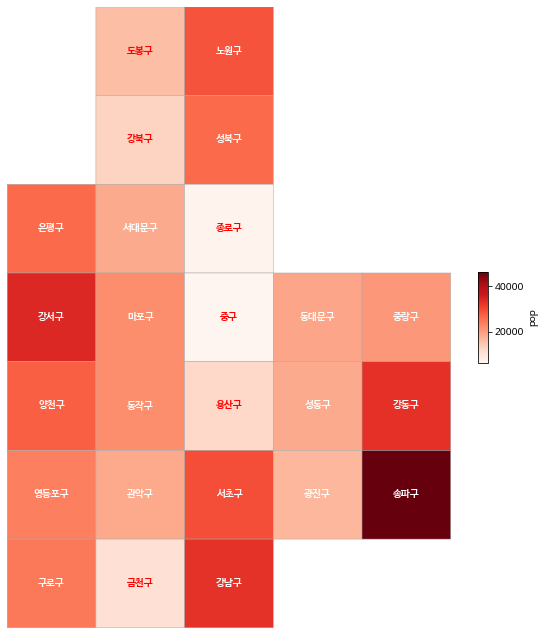

In [27]:
whitelabelmin = (max(seoul['pop']) - min(seoul['pop'])) * 0.25 + min(seoul['pop'])


vmin = min(seoul['pop'])
vmax = max(seoul['pop'])

mapdata = seoul.pivot(index='y', columns='x', values='pop')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

plt.figure(figsize=(8, 13))
plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap='Reds', edgecolor='#aaaaaa', linewidth=0.5)

# 지역 이름 표시
for idx, row in seoul.iterrows():
    annocolor = 'white' if row['pop'] > whitelabelmin else 'red'


    plt.annotate(row['자치구'], (row['x']-3.5, row['y']-0.5), weight='bold',
                 ha='center', va='center', color=annocolor)
                 
    
# 시도 경계 그린다.

plt.gca().invert_yaxis()
plt.gca().set_aspect(1)

plt.axis('off')
    
cb = plt.colorbar(shrink=.1, aspect=10)
cb.set_label('pop')

plt.tight_layout()
plt.show()